# Introducción al ML: Aprendizaje Supervisado - Clasificación (Parte I)

* Vista general del Aprendizaje Supervisado
* Problemas de Clasificación
* k-Nearest Neighbors
* Entrenamiento y test de un modelo
* Validación cruzada
* Ajuste de Híper-parámetros
* Balance entre Sesgo y Varianza



5to año - Ingeniería en Sistemas de Información

UTN - Facultad Regional Villa María

*"We are drowning in information and starving for knowledge."*

                                        –Rutherford D. Roger


## Introducción al Aprendizaje Supervisado

Objetivo de máxima: predecir salidas $y$ a partir de una matriz de entrada $X$. En donde

    
$X = 
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{n,1} & x_{n,2} & \cdots & x_{n,p} 
 \end{pmatrix}
$


es una matriz de entradas de orden $n \times p$, donde $n$ es la **cantidad de observaciones** (representando cada fila a una observación individual), mientras que $p$ es la **cantidad de predictores**. En otras palabras, $X$ es una matriz de $n$ entradas donde cada una tiene $p$ predictores. 

Por otra parte,

$y = 
 \begin{pmatrix}
  y_{1} \\
  y_{2} \\
  \vdots  \\
  y_{n}  
 \end{pmatrix}$

es un vector de orden $n \times 1$ que representa las salidas observadas asociadas a cada fila de entradas. De esta manera, $y_i$ es un escalar de salida observada a partir del vector fila de entrada observada $X_i$, donde

$X_i = 
 \begin{pmatrix}
  x_{i,1} & x_{i,2} & \cdots & x_{i,p}
 \end{pmatrix}$


Ejemplo (reducido a partir de https://archive.ics.uci.edu/ml/datasets/Mushroom):

En base a nuestro (pequeño) conjunto de datos, tenemos que determinar si un hongo es o no venenoso. Contamos con 2 predictores: el predictor 1 es la forma del sombrero del hongo mientras que el predictor 2 es el color del sombrero. Por otra parte, la salida $y_i \in \{venenoso, comestible\}$. Contamos con tres observaciones

$X = 
 \begin{pmatrix}
  \text{convexa} & \text{marrón} \\
  \text{convexa} & \text{blanco} \\
  \text{campana} & \text{blanco} 
 \end{pmatrix}
$


$y = 
 \begin{pmatrix}
  \text{venenoso} \\
  \text{comestible} \\
  \text{comestible}  
 \end{pmatrix}$
 
Dado nuestro conjunto de datos, queremos encontrar un modelo que pueda aprender cuándo un hongo es venenoso, para poder **generalizarlo** a hongos no vistos con anterioridad.

Comentario: el criterio utilizado para los nombres es el de mantener los nombres originales (en inglés) en la medida de lo posible. Esto se debe a que no existe amplia bibliografía en español sobre los temas aquí presentados, por lo tanto preferimos no traducir la mayoría de los términos, puesto que entendemos podría dificultar su posterior consulta en la bibliografía. Para aquellos términos que han sido traducidos, se aclara entre paréntesis su correspondiente término en inglés.

Vista general:
    
* Dado un conjunto de datos, existen un conjunto de variables llamado predictores (_**features** / inputs / predictors / independent variables_), los cuales pueden ser medidos.

* Los mismos tienen influencia sobre otro conjunto de una o más variables llamadas variables de respuesta (_**response** / outputs / dependent / target variables_).

* El **objetivo** de este tipo de aprendizaje es utilizar las entradas para poder **predecir** los valores de las variables de respuesta, de modo que nuestras predicciones $\hat{y}$ (el "sombrero", $\hat{}$, denota estimación) sean lo más cercanas posible a los valores verdaderos observados $y = f(X) + \epsilon$, donde $f(X)$ es la desconocida **función objetivo**.

* En el aprendizaje supervisado, contamos con un dataset $D = \{(X_1,y_1), (X_2,y_2),..., (X_n,y_n)\}$ compuesto tanto por los features de entrada $X \in \mathbb{R}^D$ como por las salidas $y \in \mathbb{R}$ o bien $y \in \{c_1, c_2, ..., c_n\}$ dependiendo de si se trata de un problema de **regresión** o de **clasificación**, respectivamente.

* Se lo considera como "supervisado" porque el agente que aprende cuenta a priori con ejemplos de comportamiento deseado. Tras **entrenar** con tales ejemplos, el agente aprende a generalizar su conocimiento de tal modo de generar buenas predicciones sobre datos no observados.

* A partir de $D$, se distinguen el subconjunto de **datos de entrenamiento**, utilizados para adaptar el modelo y el subconjunto de **datos de test**, empleados para testear la capacidad de generalización del modelo para salidas no utilizadas en el entrenamiento.

![](images/supervised_workflow.svg)

Algunos ejemplos:

* Predecir el riesgo de una determinada enfermedad.
* Identificar una persona en una fotografía.
* Predecir si un correo es o no spam.
* Predecir el costo de una casa en base a sus características.

El aprendizaje supervisado se divide en dos categorías: regresión y clasificación.

* En problemas de regresión, **las salidas son variables continuas y ordenadas**. En otras palabras, una predicción $y=14.7$ es mayor que una predicción $y=12.5$ (esto no implica que la primera predicción sea más precisa que la segunda).
* En problemas de clasificación, por su parte, **las salidas son variables nominales discretas y no ordenadas**. Es decir que si las salidas posibles son "rojo" y "naranja", no es posible asumir un orden entre ellas como "rojo" > "naranja".

Se describen a continuación dos librerías principales de python para estos problemas

### sci-kit learn

Es una librería que contiene un conjunto de algoritmos de ML de regresión, clasificación, clustering, etc. así como utilidades como sets de datos de ejemplo.

sci-kit learn intenta definir una interfaz común para todos los algoritmos. El método común de la gran mayoría de los estimadores es fit(), el cual adapta los datos de entrenamiento al modelo elegido. Dependiendo de la naturaleza de cada algoritmo, se definen distintos métodos comunes para cada uno de ellos.

Los datos en sci-kit learn, en la gran mayoría de los casos, se asumen como un array de dos dimensiones, de forma X=[n_ejemplos, n_características]. Cada ejemplo es un ítem a ser procesado (ejemplo, clasificado), pudiendo ser algo tan simple como una fila de excel a imágenes o videos.

Por su parte, las características, cuya cantidad se establece a-priori, se usan para describir cada ítem de forma cuantitativa. Normalmente son representadas por valores reales, aunque también puede tratarse de valores booleanos o discretos.

Para el aprendizaje supervisado, scikit-learn provee la siguiente interfaz común de métodos

>   + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.decision_function()` : For classification problems, some estimators provide an uncertainty estimate that is not a probability. For binary classification, a decision_function >= 0 means the positive class will be predicted, while < 0 means the negative class.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit. For classifiers, the `score` method computes the prediction accuracy. For regressors, `score` computes the coefficient of determination (R<sup>2</sup>) of the prediction.
  + `model.transform()` : For feature selection algorithms, this will reduce the dataset to the selected features. For some classification and regression models such as some linear models and random forests, this method reduces the dataset to the most informative features. These classification and regression models can therefore also be used as feature selection methods.


### sci-py

sci-py es una colección de librerías y algoritmos importante para machine learning. Normalmente el paquete a utilizar debe importarse por separado según necesidad. Algunos ejemplos:

     cluster                      : Vector Quantization / Kmeans
     fftpack                      : Discrete Fourier Transform algorithms
     integrate                    : Integration routines
     interpolate                  : Interpolation Tools
     io                           : Data input and output
     lib                          : Python wrappers to external libraries
     lib.blas                     : Wrappers to BLAS library
     lib.lapack                   : Wrappers to LAPACK library
     linalg                       : Linear algebra routines
     misc                         : Various utilities that don't have another home.
     ndimage                      : n-dimensional image package
     odr                          : Orthogonal Distance Regression
     optimize                     : Optimization Tools
     signal                       : Signal Processing Tools
     sparse                       : Sparse Matrices
     sparse.linalg                : Sparse Linear Algebra
     sparse.linalg.dsolve         : Linear Solvers
     sparse.linalg.dsolve.umfpack : :Interface to the UMFPACK library:
     sparse.linalg.eigen          : Sparse Eigenvalue Solvers
     sparse.linalg.eigen.arpack   : Eigenvalue solver using iterative methods.
     sparse.linalg.eigen.lobpcg   : Locally Optimal Block Preconditioned
                                      Conjugate Gradient Method (LOBPCG)     
     spatial                      : Spatial data structures and algorithms
     special                      : Airy Functions

     stats                        : Statistical Functions                     

In [1]:
# ejemplo: distribucion normal con media=0 y varianza=1
import numpy as np
from scipy import stats
np.random.seed(13) # semilla aleatoria: muy util para replicar experimentos
dist = stats.norm(0,1)
r = dist.rvs(10) # diez muestras aleatorias
p = dist.pdf(0) # pdf en x=0
c = dist.cdf(0) # cdf en x=0
print(r)
print('pdf =',p)
print('cdf =',c)

[-0.71239066  0.75376638 -0.04450308  0.45181234  1.34510171  0.53233789
  1.3501879   0.86121137  1.47868574 -1.04537713]
pdf = 0.3989422804014327
cdf = 0.5


## Problemas de Clasificación

* En los problemas de clasificación, la respuesta es **discreta** y **nominal**, en el sentido de que la misma es una categoria $c_i \in \{C_1, C_2, ..., C_n\}$, en donde no podemos asumir en ningún caso que $c_i > c_j$.

* Al no existir un ordenamiento entre las clases, no es posible calcular una distancia entre $y$ e $\hat{y}$, tal como sí es posible en el caso de la regresión. Entonces, medidas como el error cuadrático medio utilizado en la regresión, $$MSE = \frac{1}{n} \sum^{n}_{i=1} (\hat{y}_i - y_i)^2$$ no resultan una buenas para entrenar o evaluar un clasificador.

* Para medir la tasa de errores de un clasificador, la medida más común es el **error rate**, dado por
$$\frac{1}{n} \sum_{i=1}^n I(y_i \neq \hat{y}_i)$$
donde $I(y_i \neq \hat{y}_i) = 1$ si nuestra predicción difiere de la salida real, mientras que $I(y_i \neq \hat{y}_i) = 0$ si nuestro modelo predijo correctamente la salida para cada observación $i$.

### k Nearest-Neighbors Classifier

Un método muy simple y sin embargo muy efectivo para realizar clasificaciones es KNN: dadas $n$ observaciones en el conjunto de entrenamiento y un punto de test $X_0$, 

$$P(y = j \mid X = X_0) = \frac{1}{k} \sum_{i \in N_0} I(y_i = j)$$

donde $N_0$ es un *neighbourhood* ("vecindario") de $X_0$ representado por los $k$ puntos más cercanos a dicho punto $X_0$.

* kNN es un método **no paramétrico**, en el sentido de que no asume que las muestras provengan de una distribución probabilística parametrizada (por ejemplo con parámetros $\mu$ y $\sigma^2$).

* kNN también puede utilizarse para regresiones, en donde el valor de salida es un promedio entre los valores de las $k$ observaciones más cercanas.

Si $K=1$, este clasiicador suele llamarse simplemente "Nearest-Neighbor".

Vamos a inicializar nuestro entorno de trabajo en el Dataset Iris, tras presentarlo:

### Dataset Iris

"Iris" es un dataset que sirve como "Hello World" de ML. Consiste en un conjunto de ejemplos que contiene tres flores de Iris: setosa, virginica y versicolor. Las mismas están distribuídas en 50 ejemplos de cada flor, y sus características indican el largo y ancho tanto de su sépalo como de su pétalo, y también se especifica de qué clase de Iris se trata (setosa, virgínica o versicolor).

![](images/iris_flowers.jpg)

Fuente: David Gerster

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # sklearn.datasets contiene varios de los datasets clasicos de ML
from sklearn import neighbors

iris = load_iris()

X, y = iris.data, iris.target

# visualizamos como se relacionan el largo y el ancho del sepalo de las distintas flores
plt.scatter(X[:,0], X[:,1]) 
plt.xlabel('Largo del sépalo')  # xlabel le da un nombre al eje de las x
plt.ylabel('Ancho del sépalo')  # ylabel le da un nombre al eje de las y
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
# tomamos los primeros dos features para mostrarlos mejor graficamente (el largo y el ancho del sepalo)
# (por eso el iris.data[:, :2])
X = iris.data[:, :2]
y = iris.target

Vamos a usar ambos features para entrenar nuestro modelo y graficar los puntos del dataset para el largo y ancho del sépalo, para cada tipo de flor

In [4]:
# en primer lugar, vamos a ver las tres salidas posibles y los nombres de los features que elegimos

print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# tras esto, vamos a seleccionar todos los puntos asociados a cada una de las salidas.
# Para ello vamos a restringir la matriz de entradas X a cada una de las entradas y
# salidas que nos interesan

# y==0 restringe X a aquellas filas asociadas con la salida 0 (setosa, según el 
#nombre de los features), mientras que el 0 detrás de la "," restringe X a la columna 0
# (es decir, largo del sepalo)
X_setosa_largo_sepalo = X[y==0, 0]
print(X_setosa_largo_sepalo)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]


In [6]:
# hacemos esto mismo para las demas combinaciones
X_setosa_ancho_sepalo = X[y==0, 1]
X_virginica_largo_sepalo = X[y==1, 0]
X_virginica_ancho_sepalo = X[y==1, 1]
X_versicolor_largo_sepalo = X[y==2, 0]
X_versicolor_ancho_sepalo = X[y==2, 1]

Para nuestros fines, el módulo *pyplot* de matplotlib funciona (simplificadamente) de la siguiente manera:

1. En las primeras líneas de código se establecen los puntos, líneas o figuras que se desean graficar, como así también pueden establecerse extensiones para el gráfico (por ejemplo, darle un nombre a los ejes). Normalmente sigue el formato (para trazar curvas)

        plt.plot(x, y)
    
    (las variables $x$ e $y$ aquí mencionadas hacen referencia a posiciones en el eje cartesiano, no confundir con $X$ e $y$ del dataset)
    o bien, simplemente para graficar puntos,
    
        plt.scatter(x, y)
        
    en donde se determina que se realizará un gráfico tomando en cuenta la posición (x, y).

    Por ejemplo, el código

        plt.scatter(1, 2.5)
        
    indica que se introduce un punto en la posición $x=1$, $y=2.5$) de los ejes cartesianos.
    Lo más práctico es pasar vectores de puntos $X$ e $Y$, de tal forma que grafique cada par $(x_i, y_i)$.

2. El gráfico deja de recibir entradas tras leer la línea "plt.show()", en donde se muestra el gráfico de acuerdo a los puntos, líneas o figuras establecidas anteriormente. 

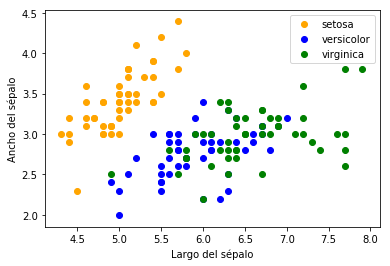

In [7]:
# graficamos de acuerdo a la distribucion de los puntos

plt.scatter(X_setosa_largo_sepalo, X_setosa_ancho_sepalo, label=iris.target_names[0], color='orange')
plt.scatter(X_virginica_largo_sepalo, X_virginica_ancho_sepalo, label=iris.target_names[1], color='blue')
plt.scatter(X_versicolor_largo_sepalo, X_versicolor_ancho_sepalo, label=iris.target_names[2], color='green')

# legend coloca una caja con las leyendas correspondientes a los puntos del grafico
plt.legend(loc='best', numpoints=1) 
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

plt.show()

Notar que es también posible graficar utilizando directamente las restricciones sobre la matriz de datos $X$:

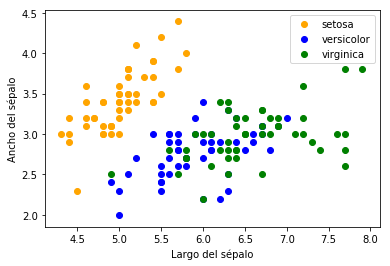

In [8]:
plt.scatter(X[y==0, 0], X[y==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X[y==1, 0], X[y==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X[y==2, 0], X[y==2, 1], label=iris.target_names[2], color='green')

plt.legend(loc='best', numpoints=1)
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

plt.show()

Veamos cómo se ve un clasificador NN "artesanal", es decir un KNN donde K=1 (basado en http://cs231n.github.io/classification/). Para ello tenemos que definir, a priori, qué consideramos como distancia entre dos vectores $X_i = (X_{i1} \dots X_{ip})$ y $X_j = (X_{j1} \dots X_{jp})$, debido a que los mismos poseen varias columnas (predictores). Para empezar, vamos a utilizar la **distancia L1**, dada por

$$d_{L1}(X_i, X_j) = \sum_p \big| X_{ip} - X_{jp} \big|$$

In [9]:
class ClasificadorNN(object):  # <object> en [...]_NN(object) indica que hereda de la clase object

    # <self> indica referencia a un objeto concreto de la clase
    def __init__(self):
        # inicializamos ambos atributos X e y arbitrariamente
        self.X = []
        self.y = []

    def fit(self, X_train, y_train):
        # para el caso de KNN, nuestro entrenamiento solo consiste en recordar los datos
        # (X, y) de entrenamiento. Un entrenamiento de un algoritmo de ML involucra
        # normalmente un proceso iterativo, que se detiene cuando alguna condicion de
        # convergencia es alcanzada (o tras una cierta cantidad de iteraciones)
        self.X = X_train
        self.y = y_train

    def predict(self, X_test):
        # inicializamos nuestra variable de salida, y_hat, con un tamanio igual a la
        # cantidad de filas
        y_hat = np.zeros(X_test.shape[0])

        for i in range(X_test.shape[0]):  # vamos a iterar sobre todas las filas de datos
            matriz_distancia = np.abs(self.X - X_test[i, :])
            
            # axis=1 significa que la suma se realiza entre los elementos de cada fila, 
            # ej. los elementos X11, X12, X13, X14 (axis=0 haría que la suma se 
            # realice entre los elementos de cada columna, es decir entre X11, X12, ...). 
            # axis=None haría que la suma se realize entre todos los elementos, devolviendo 
            # un escalar. Para mas info ver sección Examples en
            # https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
            suma_distancias = np.sum(matriz_distancia, axis=1)
            # np.argmin() devuelve el indice del menor elemento dada un ndarray
            indice_punto_mas_cercano = np.argmin(suma_distancias)
            y_hat[i] = self.y[indice_punto_mas_cercano]

        return y_hat

Antes de continuar, vamos a dividir nuestro conjunto de datos en entrenamiento y test

![](images/train_test_split.svg)

* Al conjunto de entrenamiento lo utilizaremos para **entrenar el modelo**, haciendo que aprenda patrones o características en los datos para que pueda aprender a **generalizar** a casos no vistos. La diferencia entre las observaciones en el conjunto de entrenamiento y las predicciones de nuestro modelo está expresada por el **error de entrenamiento**, y es una de las medidas que determinan qué tan bien está entrenado nuestro modelo.

* Por otra parte, al conjunto de test lo vamos a utilizar para **evaluar la capacidad de generalización del modelo**, observando cómo el mismo predice salidas a partir de entradas que no utilizó para entrenar. Similarmente, la diferencia entre las observaciones en el conjunto de test y las predicciones de nuestro modelo está expresada por el **error de test**, y es una de las medidas que nos dice qué tan bien está generalizando nuestro modelo.

In [10]:
# Vamos a usar un conjunto de entrenamiento de 70% (105/150) y uno de test de 30% (45/150)

X_train = X[0:105]
X_test = X[105:150]
y_train = y[0:105]
y_test = y[105:150]

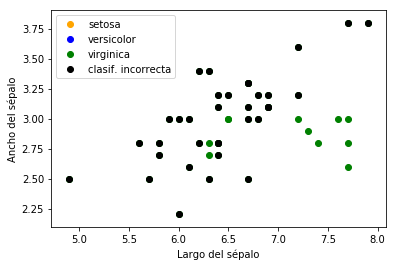

In [11]:
# Instanciamos nuestro clasificador

clf = ClasificadorNN()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)


# Graficamos los resultados

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], label=iris.target_names[2], color='green')
plt.scatter(X_test[y_test!=y_hat, 0], X_test[y_test!=y_hat, 1],
                   label='clasif. incorrecta', c='black') # Agregamos las malas predicciones

plt.legend(loc='best', numpoints=1)
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

plt.show()

In [12]:
# ¿tantos incorrectos?

print('Porcentaje de aciertos: ', len(y_test[y_test==y_hat])/len(y_test))
# estamos obteniendo el porcentaje (o tasa de aciertos) al dividir la cantidad de ocurrencias del
# conjunto y_test en donde los elementos coinciden con y_hat sobre la cantidad de ocurrencias de y_test

Porcentaje de aciertos:  0.24444444444444444


¿Por qué clasifica tan mal?

* Porque estamos tomando los datos de entrenamiento y test con **índices arbitrarios**, por ejemplo

        y_train = y[0:105]

In [13]:
# veamos mas detalladamente...

print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2]


In [14]:
print(y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


* Casi no tiene ejemplos de entrenamiento para la clase "virginica", mientras que el conjunto de test abarca toda esa clase...
* Este es un **error grave** al preparar los datos para su entrenamiento en un modelo, **porque los datos están previamente ordenados de acuerdo a algún criterio preestablecido**.

¿Solución?

* Mezclar los datos para que su orden sea aleatorio.
* Afortunadamente scikit\_learn nos provee con un método justo para hacer eso...

In [15]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto en train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80, test_size=0.3)

# vemos los resultados...
print(y_test)

[0 0 0 1 0 1 1 0 0 0 2 1 1 0 2 1 0 1 0 0 0 2 2 1 1 0 2 1 1 2 0 1 0 1 2 1 0
 1 1 0 0 0 1 1 1]


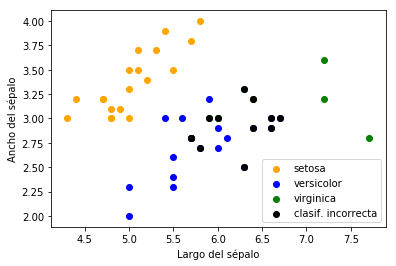

In [16]:
#Probamos nuevamente...
 
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Graficamos los resultados

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], label=iris.target_names[2], color='green')
plt.scatter(X_test[y_test!=y_hat, 0], X_test[y_test!=y_hat, 1],
                   label='clasif. incorrecta', c='black') # Agregamos las malas predicciones

plt.legend(loc='best', numpoints=1)
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

plt.show()

In [17]:
# veamos ahora...

print('Porcentaje de aciertos: ', len(y_test[y_test==y_hat])/len(y_test))

Porcentaje de aciertos:  0.7333333333333333


scikit-learn ofrece herramientas muy similares al clasificador que implementamos. Veamos cómo podemos implementar un clasificador NN utilizando la librería a alto nivel de scikit-learn.

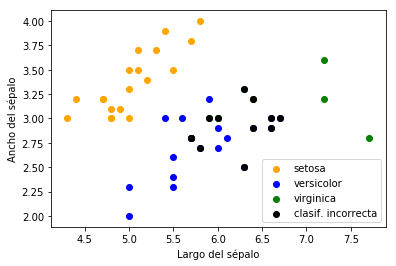

In [18]:
# Instanciamos nuestro clasificador
clf_sk = neighbors.KNeighborsClassifier(n_neighbors=1, p=1)

clf_sk.fit(X_train,y_train)
y_hat = clf_sk.predict(X_test)

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label=iris.target_names[0], color='orange')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label=iris.target_names[1], color='blue')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], label=iris.target_names[2], color='green')
plt.scatter(X_test[y_test!=y_hat, 0], X_test[y_test!=y_hat, 1],
                   label='clasif. incorrecta', c='black') # Agregamos las malas predicciones

plt.legend(loc='best', numpoints=1)
plt.xlabel('Largo del sepalo')
plt.ylabel('Ancho del sepalo')

plt.show()

In [19]:
print('Tasa de aciertos: ', len(y_test[y_test==y_hat])/len(y_test))

Tasa de aciertos:  0.7333333333333333


También podemos obtener esta misma tasa a partir de los métodos de scikit-learn, lo cual nos ahorra el tener que hacerlo a mano.

In [20]:
from sklearn.metrics import accuracy_score

print('Tasa de aciertos: ', accuracy_score(y_true=y_test, y_pred=y_hat))

Tasa de aciertos:  0.7333333333333333


## Validación cruzada

Nuestra mejora en la tasa de aciertos se debió a que reordenamos el conjunto de datos aleatoriamente. Ahora bien, ¿qué sucedería si tenemos realmente muy mala suerte en el ordenamiento de los datos y volviéramos a tener un conjunto parecido al primero? ¿Y si en cambio tenemos muy buena suerte y el porcentaje de aciertos alcanzado es mucho mayor porque las predicciones mas difíciles estaban en el conjunto de entrenamiento?

* **Validación cruzada**: los datos son repetidamente separados en pares no superpuestos de entrenamiento y test, donde se ajusta un modelo separado para cada uno de dichos pares y se promedian los resultados.

* El método más común de validación cruzada es *k-folds*, donde los datos son separados en *k* pliegues (folds, normalmente son 5 o 10), donde para cada iteración se usa uno de los pliegues como conjunto de test y el resto como conjunto de entrenamiento, siendo la salida el promedio de los errores de todas las iteraciones.

* Este método asegura que todos los datos sean incluidos en el conjunto de test al menos una vez.

* Desventaja: aumenta muy considerablemente el costo computacional, haciendo que este método sea muy caro para datasets grandes.

![](images/k-fold_cross_validation.png)



## Ajuste de Híper-parámetros

Ahora que sabemos cómo evaluar un modelo, vamos a ver el que es uno de los temas más complejos en ML: el ajuste de los híper-parámetros.

* Quitando el caso de kNN, casi todo modelo internamente relaciona las entradas con las salidas por medio de **parámetros** que, dicho informalmente, expresan características del mismo.

* Es en los parámetros que el modelo "guarda su aprendizaje" tras el entrenamiento, el cual suele consistir en ajustar iterativamente tales parámetros hasta que los mismos se estabilicen o alcancen alguna métrica.

* Por ejemplo, en una regresión lineal donde $\hat{y} = ax + b$, los parámetros son $a$ y $b$.

* Ahora bien, existen características que definen al modelo pero no son modificadas en el entrenamiento sino que se ubican en un nivel más alto de abstracción que los parámetros. Tales se conocen como **híper-parámetros**, y se denotan por $\theta = (\theta_1, \theta_2, \dots)$.

* Los híper-parámetros son cruciales en el aprendizaje de un modelo, porque afectan cómo el mismo se desempeña y entrena.

* Pueden ir desde un nivel bajo de abstracción, por ejemplo $\theta$ puede representar la cantidad $k$ de vecinos en un algoritmo kNN, escalar más en la abstracción y representar la fórmula de distancia entre dos vectores, o bien escalar mucho más y representar qué modelo se utiliza (en ese caso tal híper-parámetro se suele denotar como $M$).

* Es en el ajuste de híper-parámetros uno de los puntos principales donde ML **es más un arte que una ciencia**.

* Muchas veces los $\theta$ son establecidos por "decisiones de diseño" (ejemplo: "vamos a utilizar el siguiente modelo por su capacidad de explicar sus predicciones"); otras veces son establecidos a mano por prueba y error, y otras veces son ajustados a partir de algún método.

* Vamos a ver una forma de ajustarlos: separar un subconjunto del conjunto de entrenamiento para validación del modelo y utilizar Grid Search.

![](images/cross-validation_and_hyperparams.jpeg)

Fuente: curso Convolutional Neural Networks for Visual Recognition (2016)

* Vamos a usar el fold amarillo, denominado **subconjunto de validación** para ajustar los híper-parámetros (en la siguiente sección veremos por qué).
* Una vez determinados los mejores híper-parámetros, el conjunto de test debe entonces utilizarse una única vez para ver el resultado final de nuestro predictor.


## Repaso: equilibrio entre sesgo y varianza (_bias/variance tradeoff_)

En aprendizaje supervisado, al elegir un modelo o sus híper-parámetros, existe un balance entre dos tipos de errores a minimizar: por un lado está el **error de sesgo**, que ocurre por la diferencia entre la realidad y las asunciones que tomamos con nuestro modelo y sus híper-parámetros. Un error alto de sesgo produce lo que se denomina **underfitting**.

Por otra parte está el **error de varianza**, el cual ocurre cuando el modelo se ajusta a las pequeñas fluctuaciones en el conjunto de datos ocasionadas por el ruido o la estocacidad inherente al generar los datos.

* Tales errores son contrapuestos y dependen de la **flexibilidad del modelo**, como puede verse en la figura.

![](images/bias_variance_tradeoff.png)

(Fuente: Hastie et. al. - An Introduction to Statistical Learning with Applications in R (2013))


Ejemplo de underfitting:

![](images/underfitting.png)

En la práctica, el overfitting suele ser mucho más problemático que el underfitting. Esto es debido a que hoy en día se dispone de modelos que son capaces de ser muy flexibles, por lo que el underfitting es fácilmente resuelto. El problema mayor es el overfitting. Ejemplos (fuente: https://ml.berkeley.edu/blog/2017/07/13/tutorial-4/):

![](images/overfitting.png)

![](images/doger_fitting_1.jpg)

![](images/doger_fitting_2.jpg)



Lo cual ha tenido consecuencias catastróficas. Ejemplo: criterio de construcción de la planta nuclear de Japón (300 vs. 13000 años):

![](images/earthquake-fit-analysis.png)

## Trabajo Práctico 3

### Ejercicios básicos

1. Usando un clasificador kNN (\*), elegir una porción (por ejemplo un 10%-30%) del subconjunto de entrenamiento y usarla para optimizar el híper-parámetro $k$ (cantidad de vecinos) con grid-search (es decir con búsqueda iterativa con fuerza bruta) desde $k=1$ hasta $k=20$, tomando como criterio la tasa de aciertos. Mostrar en pantalla las tasas de aciertos de los distintos $k$ y guardar el mejor $k$. Nota: si el porcentaje de aciertos no cambia según el $k$, intentar con un porcentaje más alto del conjunto de validación usado para optimizar $k$.

(\*) El clasificador kNN usado para la resolución de este ejercicio puede ser el de scikit-learn usado más arriba, donde k está definido por *n_neighbours*, o bien el kNN artesanal adaptado en el ejercicio Complementario 1 para compararse con $k$ cantidad de vecinos.

2. Utilizando el $k$ que maximiza la tasa de aciertos del conjunto de validación, entrenar el modelo con tal $k$ y con todo el conjunto de entrenamiento y determinar cuál es la tasa de aciertos al predecir los $X$ del conjunto de test.

3. Tomando como base los gráficos donde se muestran los errores de acierto, graficar los resultados de la clasificación para los features Largo y Ancho del *Pétalo*. Este nuevo gráfico debe colorear aquellos puntos que fueron correctamente clasificados de color verde (sin importar a qué clase pertenece), mientras que aquellos puntos que fueron mal clasificados debe colorearlos de rojo (también independientemente de la clase).

### Ejercicios complementarios

1. Modificar el clasificador NN artesanal de este notebook para hacerlo kNN, de forma tal que pueda realizar predicciones en el dataset Iris (no es necesario que el mismo sea general para cualquier dataset, alcanza con que funcione para los features del Iris). Hacer una pequeña prueba en el dataset Iris con diferentes $k$ para verificar su correcto funcionamiento.



### Ejercicio extra

1. Tomando el clasificador kNN de alto nivel de scikit-learn, hacer un k-folds de 5 pliegues (es decir 5 divisiones training, validation) en el conjunto de entrenamiento para obtener la tasa de aciertos promedio con respecto al conjunto de validación (al final del notebook se pone una plantilla para k-folds). Mostrar en pantalla la tasa de acierto de cada una de las 5 divisiones, junto con el promedio de las mismas. ¿Es considerable la diferencia entre los aciertos de las 5 divisiones? Justifique brevemente el motivo de su respuesta.

Fecha de entrega: 02/05/2019 23:59

La resolución de los ejercicios de este TP es **individual**. Está permitida la reutilización del código del notebook (por ejemplo para confeccionar gráficos).

In [21]:
# Plantilla inicial de ejemplo para KFolds, para ejercicio extra

from sklearn.model_selection import KFold

# n_splits es el numero de divisiones
kf = KFold(n_splits=5, shuffle=True,random_state=40)

# El siguiente for nos abstrae de tener que manejar explicitamente los subindices de los folds, 
# al dividir el conjunto de entrenamiento iterativamente. En cada una de sus iteraciones
# obtenemos los subindices de todos los folds de entrenamiento y del fold de validacion de una
# division en particular, de modo tal que todos los k folds sean al menos una vez usados para 
# entrenar el modelo
for train_index, validation_index in kf.split(X_train):
    X_train_kf, X_validation_kf = X_train[train_index], X_train[validation_index]
    y_train_kf, y_validation_kf = y_train[train_index], y_train[validation_index]
    
    # desde aqui estamos trabajando con una division train-validation en particular
    # es decir, por ejemplo, que train_index nos da todos los indices que componen a
    # los folds que se usaran para entrenar el modelo en esta division. Usamos estos
    # indices para obtener los X_train_kf y los y_train_kf. Lo mismo sucede con los
    # indices usados para el fold de validación en esta division. Si se desea ver
    # como cambian los indices en cada iteracion, hacer un print(validation_index)